In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
train = pd.read_csv('/content/training_set.csv')
test = pd.read_excel('/content/test_set.xlsx')

In [4]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay
0,HI,33,area_code_415,no,no,0,200.5,117,34.09,159.9,111,13.59,196.2,84,8.83,16.3,6,4.40,3,no
1,TN,80,area_code_415,yes,no,0,276.5,122,47.01,195.6,79,16.63,210.3,78,9.46,7.2,3,1.94,1,yes
2,CT,37,area_code_408,no,no,0,134.9,98,22.93,248.4,130,21.11,236.2,113,10.63,14.7,2,3.97,3,no
3,TN,106,area_code_415,no,no,0,119.2,142,20.26,228.4,139,19.41,197.9,61,8.91,8.4,9,2.27,2,no
4,TX,123,area_code_408,no,no,0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,5,3.59,3,no


In [ ]:
train.shape

(3000, 20)

In [ ]:
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,MI,102,area_code_510,no,no,0,242.2,88,41.17,233.2,89,19.82,188.5,121,8.48,6.2,6,1.67,3
1,VA,139,area_code_510,no,yes,23,157.6,129,26.79,247.0,96,21.00,259.2,112,11.66,13.7,2,3.70,0
2,TX,128,area_code_415,no,yes,40,171.2,88,29.10,145.7,109,12.38,196.8,93,8.86,14.0,6,3.78,1
3,FL,79,area_code_510,no,no,0,130.2,119,22.13,290.9,121,24.73,194.8,140,8.77,14.0,6,3.78,3
4,DE,127,area_code_510,no,no,0,241.7,115,41.09,141.5,96,12.03,170.7,94,7.68,4.5,5,1.22,2


In [ ]:
test.shape

(202, 19)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3000 non-null   object 
 1   account_length                 3000 non-null   int64  
 2   area_code                      3000 non-null   object 
 3   international_plan             3000 non-null   object 
 4   voice_mail_plan                3000 non-null   object 
 5   number_vmail_messages          3000 non-null   int64  
 6   total_day_minutes              3000 non-null   float64
 7   total_day_calls                3000 non-null   int64  
 8   total_day_charge               3000 non-null   float64
 9   total_eve_minutes              3000 non-null   float64
 10  total_eve_calls                3000 non-null   int64  
 11  total_eve_charge               3000 non-null   float64
 12  total_night_minutes            3000 non-null   f

In [ ]:
train['payment_delay'].value_counts()

,count
payment_delay,
no,2587
yes,413


In [ ]:
train['state'].nunique()

51

In [ ]:
train.select_dtypes(include='object').columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan',
       'payment_delay'],
      dtype='object')

In [ ]:
train.select_dtypes(include='number').columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

Encode payment_delay to see the corelation beetween other numerical columns

In [ ]:
train['payment_delay'] = train['payment_delay'].map({'no': 0 , 'yes': 1})

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay
0,HI,33,area_code_415,no,no,0,200.5,117,34.09,159.9,111,13.59,196.2,84,8.83,16.3,6,4.40,3,0
1,TN,80,area_code_415,yes,no,0,276.5,122,47.01,195.6,79,16.63,210.3,78,9.46,7.2,3,1.94,1,1
2,CT,37,area_code_408,no,no,0,134.9,98,22.93,248.4,130,21.11,236.2,113,10.63,14.7,2,3.97,3,0
3,TN,106,area_code_415,no,no,0,119.2,142,20.26,228.4,139,19.41,197.9,61,8.91,8.4,9,2.27,2,0
4,TX,123,area_code_408,no,no,0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,5,3.59,3,0


In [ ]:
cols = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls','payment_delay']

##EDA

In [ ]:
train[cols].corr().style.background_gradient(cmap='coolwarm')

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay
account_length,1.000000,-0.053027,-0.003457,0.023510,-0.003461,-0.008875,-0.007510,-0.008860,-0.002266,-0.003619,-0.002288,0.015526,0.009690,0.015551,-0.000233,0.032944
number_vmail_messages,-0.053027,1.000000,0.014207,0.007241,0.014195,0.006555,-0.006489,0.006572,0.000001,-0.020136,0.000019,0.000181,-0.003994,0.000289,-0.013780,-0.097651
total_day_minutes,-0.003457,0.014207,1.000000,0.012402,1.000000,-0.004703,0.007082,-0.004704,0.029449,-0.012539,0.029408,-0.033342,0.005317,-0.033214,0.001566,0.215140
total_day_calls,0.023510,0.007241,0.012402,1.000000,0.012402,-0.006429,0.026555,-0.006420,-0.003203,-0.028160,-0.003205,0.021987,0.012745,0.022070,-0.005236,-0.002518
total_day_charge,-0.003461,0.014195,1.000000,0.012402,1.000000,-0.004704,0.007077,-0.004705,0.029445,-0.012537,0.029404,-0.033347,0.005311,-0.033219,0.001562,0.215136
total_eve_minutes,-0.008875,0.006555,-0.004703,-0.006429,-0.004704,1.000000,-0.008810,1.000000,-0.019995,0.011491,-0.019981,0.004623,0.006184,0.004720,-0.012501,0.088606
total_eve_calls,-0.007510,-0.006489,0.007082,0.026555,0.007077,-0.008810,1.000000,-0.008802,0.007539,0.005362,0.007583,-0.012345,0.000003,-0.012401,-0.021812,-0.011318
total_eve_charge,-0.008860,0.006572,-0.004704,-0.006420,-0.004705,1.000000,-0.008802,1.000000,-0.020017,0.011489,-0.020004,0.004622,0.006193,0.004720,-0.012533,0.088584
total_night_minutes,-0.002266,0.000001,0.029449,-0.003203,0.029445,-0.019995,0.007539,-0.020017,1.000000,0.012387,0.999999,0.007447,-0.004269,0.007457,0.007716,0.041503
total_night_calls,-0.003619,-0.020136,-0.012539,-0.028160,-0.012537,0.011491,0.005362,0.011489,0.012387,1.000000,0.012346,-0.015764,0.001830,-0.015878,-0.004474,-0.007285


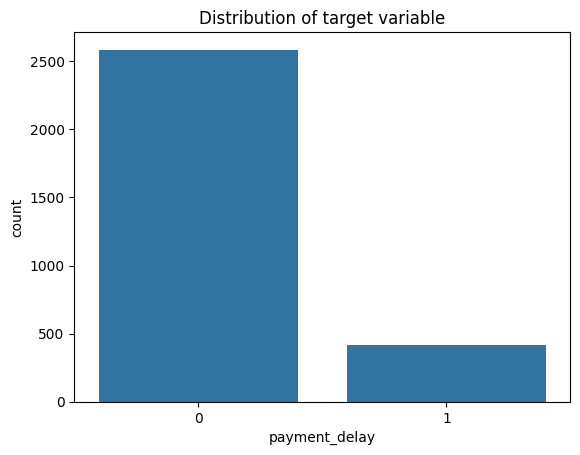

In [ ]:
sns.countplot(x='payment_delay',data=train)
plt.title('Distribution of target variable')
plt.show()


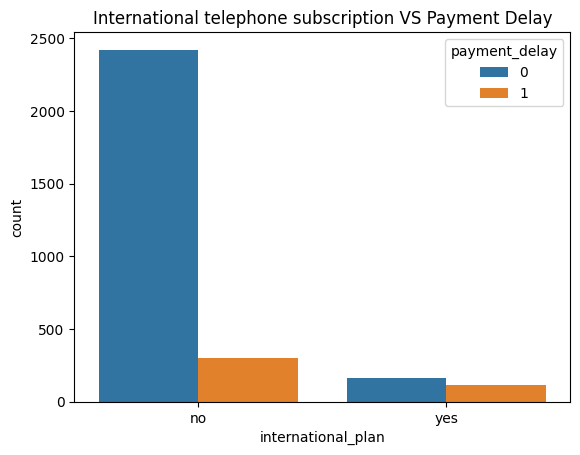

In [ ]:
sns.countplot(x='international_plan',hue='payment_delay',data=train)
plt.title('International telephone subscription VS Payment Delay')
plt.show()


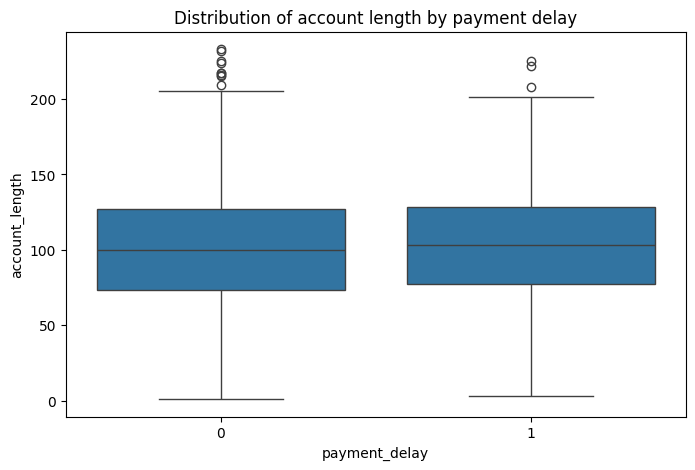

In [ ]:
plt.figure(figsize=(8,5))

sns.boxplot(x='payment_delay',y='account_length',data=train)
plt.title('Distribution of account length by payment delay')
plt.show()

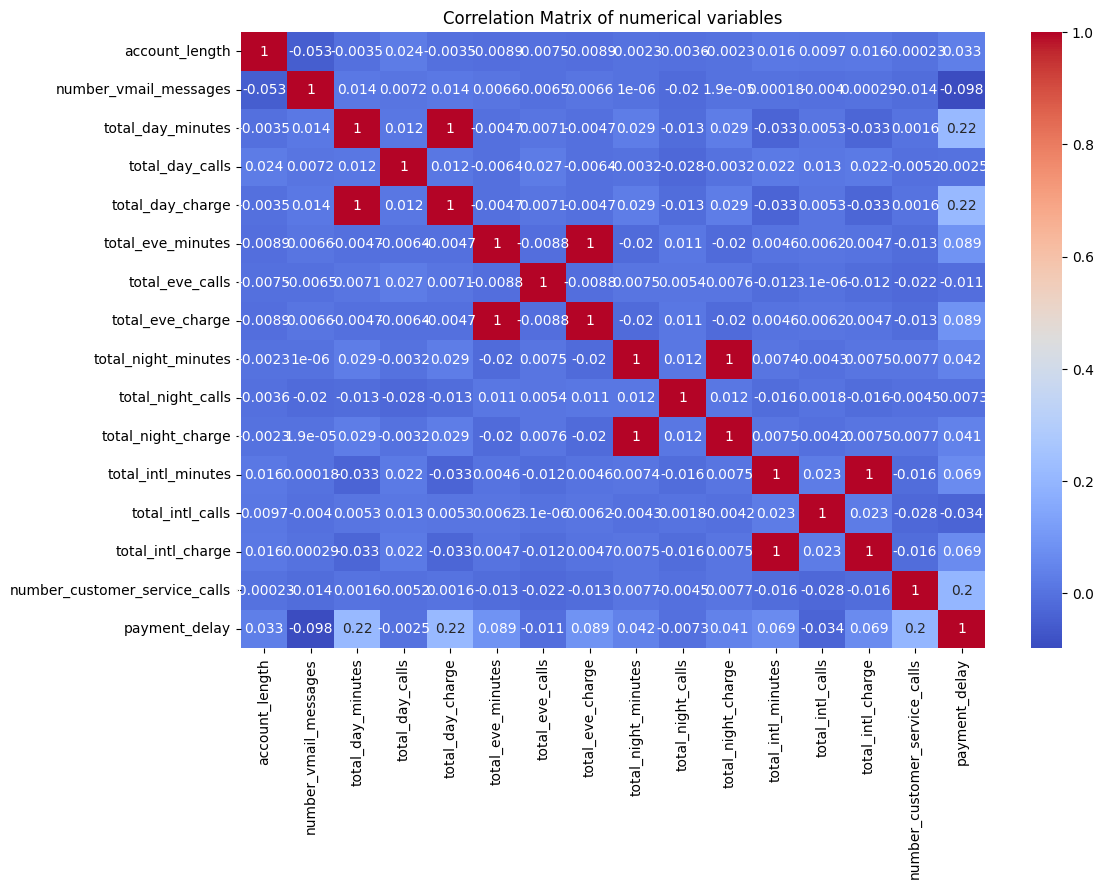

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(train.corr(numeric_only=True),cmap='coolwarm',annot=True)
plt.title('Correlation Matrix of numerical variables')
plt.show()

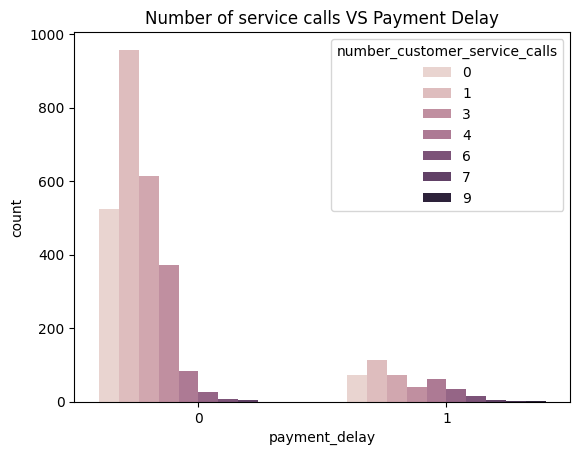

In [ ]:
sns.countplot(x='payment_delay',hue='number_customer_service_calls',data=train)
plt.title('Number of service calls VS Payment Delay')
plt.show()

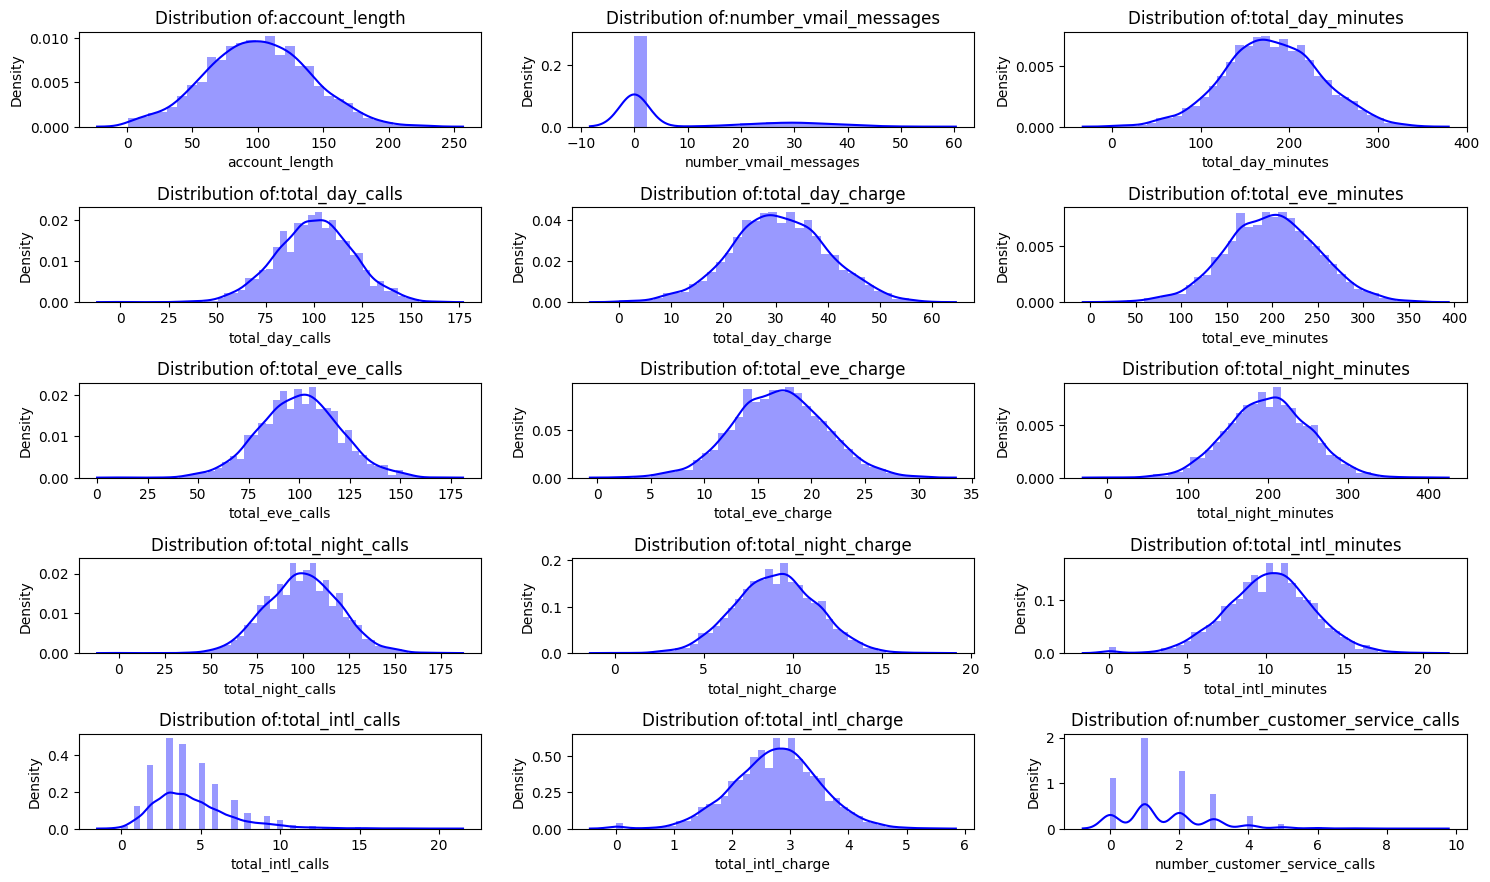

In [ ]:
plt.figure(figsize=(15,12))

for i, c in enumerate(train.drop(columns='payment_delay').select_dtypes(include='number').columns):
  plt.subplot(7, 3, i +1)
  sns.distplot(train[c], color='blue')
  plt.title('Distribution of:' + c)
  plt.tight_layout()


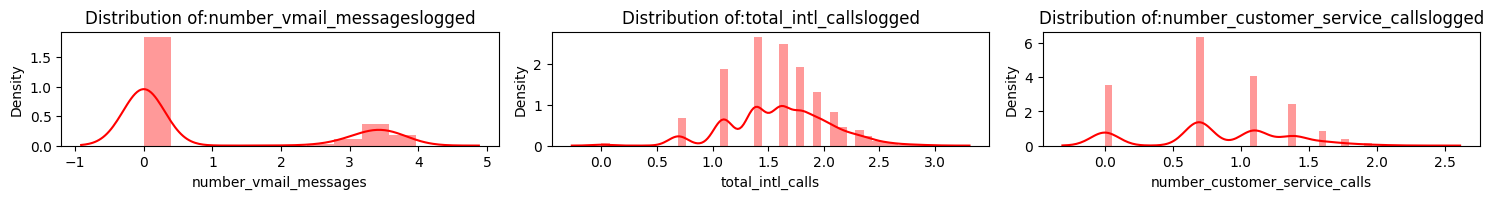

In [ ]:
cols = 'number_vmail_messages','total_intl_calls','number_customer_service_calls'
plt.figure(figsize=(15,12))

for i , c in enumerate(cols):
  plt.subplot(7, 3, i + 1)
  sns.distplot(train[c].apply('log1p'),color='red')
  plt.title('Distribution of:' + c +'logged')
  plt.tight_layout()

Apply log1p on columns ['number_vmail_messages','total_intl_calls','number_customer_service_calls']

In [ ]:
skewed_cols = ['number_vmail_messages','total_intl_calls','number_customer_service_calls']

In [ ]:
for col in skewed_cols:
  train[col] = train[col].apply('log1p')

Encode Categorical Variables

In [ ]:
train['state'].nunique()

51

In [ ]:
train['area_code'].nunique()

3

In [ ]:
train['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [ ]:
train['international_plan'].nunique()

2

In [ ]:
train['voice_mail_plan'].nunique()

2

Mapping: international_plan, voice_mail_plan

In [ ]:
train['international_plan'] = train['international_plan'].map({'no': 0, 'yes':1})
train['voice_mail_plan'] = train['voice_mail_plan'].map({'no': 0, 'yes': 1})

One-Hot Encodin on state, area_code

In [ ]:
train = pd.get_dummies(train,columns=['state','area_code'],drop_first=True)

In [ ]:
train = train.drop(columns='state_HI')

In [ ]:
train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510
0,33,0,0,0.0,200.5,117,34.09,159.9,111,13.59,196.2,84,8.83,16.3,1.945910,4.40,1.386294,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,80,1,0,0.0,276.5,122,47.01,195.6,79,16.63,210.3,78,9.46,7.2,1.386294,1.94,0.693147,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,37,0,0,0.0,134.9,98,22.93,248.4,130,21.11,236.2,113,10.63,14.7,1.098612,3.97,1.386294,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,106,0,0,0.0,119.2,142,20.26,228.4,139,19.41,197.9,61,8.91,8.4,2.302585,2.27,1.098612,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,123,0,0,0.0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,1.791759,3.59,1.386294,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
train.shape

(3000, 69)

Split data - X, y

In [ ]:
X_nsc = train.drop(columns='payment_delay')
y = train['payment_delay']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_nsc,X_test_nsc,y_train,y_test = train_test_split(X_nsc,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

def metrics(y_test,y_pred):
  print(classification_report(y_test,y_pred))
  print('Confusion Matrix: ',confusion_matrix(y_test,y_pred))
  print('Accuracy Score: ', accuracy_score(y_test,y_pred))

#Applying Algorithms without scaling

1. Logical Regressor Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_nsc = LogisticRegression()

In [ ]:
lr_nsc.fit(X_train_nsc,y_train)

LogisticRegression()

In [ ]:
y_pred_lr_nsc = lr_nsc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_lr_nsc)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       523
           1       0.41      0.14      0.21        77

    accuracy                           0.86       600
   macro avg       0.65      0.56      0.57       600
weighted avg       0.82      0.86      0.83       600

Confusion Matrix:  [[507  16]
 [ 66  11]]
Accuracy Score:  0.8633333333333333


2. SVM Classifiee

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_nsc = SVC()

In [ ]:
svc_nsc.fit(X_train_nsc,y_train)

SVC()

In [ ]:
y_pred_svc_nsc = svc_nsc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_svc_nsc)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       523
           1       0.00      0.00      0.00        77

    accuracy                           0.87       600
   macro avg       0.44      0.50      0.47       600
weighted avg       0.76      0.87      0.81       600

Confusion Matrix:  [[523   0]
 [ 77   0]]
Accuracy Score:  0.8716666666666667


3. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knnc_nsc = KNeighborsClassifier()

In [ ]:
knnc_nsc.fit(X_train_nsc,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knnc_nsc = knnc_nsc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_knnc_nsc)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       523
           1       0.48      0.21      0.29        77

    accuracy                           0.87       600
   macro avg       0.69      0.59      0.61       600
weighted avg       0.84      0.87      0.85       600

Confusion Matrix:  [[506  17]
 [ 61  16]]
Accuracy Score:  0.87


4. Decission Tree Classifie

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc_nsc = DecisionTreeClassifier()

In [ ]:
dtc_nsc.fit(X_train_nsc,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc_nsc = dtc_nsc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_dtc_nsc)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       523
           1       0.57      0.70      0.63        77

    accuracy                           0.89       600
   macro avg       0.76      0.81      0.78       600
weighted avg       0.90      0.89      0.90       600

Confusion Matrix:  [[482  41]
 [ 23  54]]
Accuracy Score:  0.8933333333333333


5. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train_nsc,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_rfc)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       523
           1       0.92      0.60      0.72        77

    accuracy                           0.94       600
   macro avg       0.93      0.79      0.85       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:  [[519   4]
 [ 31  46]]
Accuracy Score:  0.9416666666666667


6. Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc_nsc = ExtraTreesClassifier()

In [ ]:
etc_nsc.fit(X_train_nsc,y_train)

ExtraTreesClassifier()

In [ ]:
y_pred_etc_nsc = etc_nsc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_etc_nsc)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       523
           1       0.93      0.35      0.51        77

    accuracy                           0.91       600
   macro avg       0.92      0.67      0.73       600
weighted avg       0.91      0.91      0.90       600

Confusion Matrix:  [[521   2]
 [ 50  27]]
Accuracy Score:  0.9133333333333333


7. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_nsc = GradientBoostingClassifier()

In [ ]:
gbc_nsc.fit(X_train_nsc,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc_nsc = gbc_nsc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_gbc_nsc)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       523
           1       0.87      0.68      0.76        77

    accuracy                           0.94       600
   macro avg       0.91      0.83      0.86       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:  [[515   8]
 [ 25  52]]
Accuracy Score:  0.945


8. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc_nsc = XGBClassifier()

In [ ]:
xgbc_nsc.fit(X_train_nsc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgbc_nsc = xgbc_nsc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_xgbc_nsc)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       523
           1       0.85      0.69      0.76        77

    accuracy                           0.94       600
   macro avg       0.91      0.84      0.87       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:  [[514   9]
 [ 24  53]]
Accuracy Score:  0.945


9. LightGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbc_nsc = LGBMClassifier()

In [ ]:
lgbc_nsc.fit(X_train_nsc,y_train)

[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2463
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -> initscore=-1.815290
[LightGBM] [Info] Start training from score -1.815290


LGBMClassifier()

In [ ]:
y_pred_lgbc_nsc = lgbc_nsc.predict(X_test_nsc)

In [ ]:
metrics(y_test,y_pred_lgbc_nsc)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       523
           1       0.89      0.71      0.79        77

    accuracy                           0.95       600
   macro avg       0.92      0.85      0.88       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:  [[516   7]
 [ 22  55]]
Accuracy Score:  0.9516666666666667


#Scaling numerical variables

1. StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
ss = StandardScaler()

In [ ]:
scal_cols = ['account_length',	'number_vmail_messages',	'total_day_minutes',	'total_day_calls',	'total_day_charge',
          	'total_eve_minutes',	'total_eve_calls',	'total_eve_charge',	'total_night_minutes'	,'total_night_calls'	,
            'total_night_charge',	'total_intl_minutes'	,'total_intl_calls',	'total_intl_charge',	'number_customer_service_calls']

In [ ]:
X_train_sc_ss = X_train_nsc.copy()
X_train_sc_ss[scal_cols] = ss.fit_transform(X_train_nsc[scal_cols])

X_test_sc_ss = X_test_nsc.copy()
X_test_sc_ss[scal_cols] = ss.transform(X_test_nsc[scal_cols])

2. MinMaxScaler

In [ ]:
mm = MinMaxScaler()

In [ ]:
X_train_sc_mm = X_train_nsc.copy()
X_train_sc_mm[scal_cols] =  mm.fit_transform(X_train_nsc[scal_cols])

X_test_sc_mm = X_test_nsc.copy()
X_test_sc_mm[scal_cols] = mm.transform(X_test_nsc[scal_cols])

#Applying Algorithms with StandardScaler and MinMaxScaler

1.1  Logistic Regressor  (StandardScaler)

In [ ]:
lr_sc_ss = LogisticRegression()

In [ ]:
lr_sc_ss.fit(X_train_sc_ss,y_train)

LogisticRegression()

In [ ]:
y_pred_lr_sc_ss = lr_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_lr_sc_ss)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       523
           1       0.48      0.17      0.25        77

    accuracy                           0.87       600
   macro avg       0.68      0.57      0.59       600
weighted avg       0.84      0.87      0.84       600

Confusion Matrix:  [[509  14]
 [ 64  13]]
Accuracy Score:  0.87


1.2  Logistic Regressor  (MinMaxScaler)

In [ ]:
lr_sc_mm = LogisticRegression()

In [ ]:
lr_sc_mm.fit(X_train_sc_mm,y_train)

LogisticRegression()

In [ ]:
y_pred_lr_sc_mm = lr_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_lr_sc_mm)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       523
           1       0.40      0.10      0.16        77

    accuracy                           0.86       600
   macro avg       0.64      0.54      0.55       600
weighted avg       0.82      0.86      0.83       600

Confusion Matrix:  [[511  12]
 [ 69   8]]
Accuracy Score:  0.865


2.1 SVM Classifier  (StandardScaler)

In [ ]:
svc_sc_ss = SVC()

In [ ]:
svc_sc_ss.fit(X_train_sc_ss,y_train)

SVC()

In [ ]:
y_pred_svc_sc_ss = svc_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_svc_sc_ss)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       523
           1       0.96      0.31      0.47        77

    accuracy                           0.91       600
   macro avg       0.93      0.65      0.71       600
weighted avg       0.91      0.91      0.89       600

Confusion Matrix:  [[522   1]
 [ 53  24]]
Accuracy Score:  0.91


2.2 SVM Classifier  (MinMaxScaler)

In [ ]:
svc_sc_mm = SVC()

In [ ]:
svc_sc_mm.fit(X_train_sc_mm,y_train)

SVC()

In [ ]:
y_pred_svc_sc_mm = svc_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_svc_sc_mm)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       523
           1       1.00      0.01      0.03        77

    accuracy                           0.87       600
   macro avg       0.94      0.51      0.48       600
weighted avg       0.89      0.87      0.82       600

Confusion Matrix:  [[523   0]
 [ 76   1]]
Accuracy Score:  0.8733333333333333


3.1 KNN Classifier  (StandardScaler)

In [ ]:
knnc_sc_ss = KNeighborsClassifier()

In [ ]:
knnc_sc_ss.fit(X_train_sc_ss,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knnc_sc_ss = knnc_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_knnc_sc_ss)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       523
           1       0.91      0.26      0.40        77

    accuracy                           0.90       600
   macro avg       0.91      0.63      0.68       600
weighted avg       0.90      0.90      0.88       600

Confusion Matrix:  [[521   2]
 [ 57  20]]
Accuracy Score:  0.9016666666666666


3.2 KNN Classifier  (MinMaxScaler)

In [ ]:
knnc_sc_mm = KNeighborsClassifier()

In [ ]:
knnc_sc_mm.fit(X_train_sc_mm,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knnc_sc_mm = knnc_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_knnc_sc_mm)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       523
           1       0.31      0.05      0.09        77

    accuracy                           0.86       600
   macro avg       0.59      0.52      0.51       600
weighted avg       0.80      0.86      0.82       600

Confusion Matrix:  [[514   9]
 [ 73   4]]
Accuracy Score:  0.8633333333333333


4.1 Decision Tree Classifier (StandardScaler)

In [ ]:
dtc_sc_ss = DecisionTreeClassifier()

In [ ]:
dtc_sc_ss.fit(X_train_sc_ss,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc_sc_ss = dtc_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_dtc_sc_ss)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       523
           1       0.54      0.69      0.61        77

    accuracy                           0.89       600
   macro avg       0.75      0.80      0.77       600
weighted avg       0.90      0.89      0.89       600

Confusion Matrix:  [[478  45]
 [ 24  53]]
Accuracy Score:  0.885


4.2 Decision Tree Classifier (MinMaxScaler)

In [ ]:
dtc_sc_mm = DecisionTreeClassifier()

In [ ]:
dtc_sc_mm.fit(X_train_sc_mm,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc_sc_mm = dtc_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_dtc_sc_mm)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       523
           1       0.61      0.71      0.66        77

    accuracy                           0.91       600
   macro avg       0.78      0.82      0.80       600
weighted avg       0.91      0.91      0.91       600

Confusion Matrix:  [[488  35]
 [ 22  55]]
Accuracy Score:  0.905


5.1 Random Forest Classifier (StandardScaler)

In [ ]:
rfc_sc_ss = RandomForestClassifier()

In [ ]:
rfc_sc_ss.fit(X_train_sc_ss,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc_sc_ss = rfc_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_rfc_sc_ss)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       523
           1       0.89      0.55      0.68        77

    accuracy                           0.93       600
   macro avg       0.92      0.77      0.82       600
weighted avg       0.93      0.93      0.93       600

Confusion Matrix:  [[518   5]
 [ 35  42]]
Accuracy Score:  0.9333333333333333


5.2 Random Forest Classifier (MinMaxScaler)

In [ ]:
rfc_sc_mm = RandomForestClassifier()

In [ ]:
rfc_sc_mm.fit(X_train_sc_mm,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc_sc_mm = rfc_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_rfc_sc_mm)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       523
           1       0.93      0.55      0.69        77

    accuracy                           0.94       600
   macro avg       0.94      0.77      0.83       600
weighted avg       0.94      0.94      0.93       600

Confusion Matrix:  [[520   3]
 [ 35  42]]
Accuracy Score:  0.9366666666666666


6.1 Extra Trees Classifier (StandardScaler)

In [ ]:
etc_sc_ss = ExtraTreesClassifier()

In [ ]:
etc_sc_ss.fit(X_train_sc_ss,y_train)

ExtraTreesClassifier()

In [ ]:
y_pred_etc_sc_ss = etc_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_etc_sc_ss)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       523
           1       0.90      0.36      0.52        77

    accuracy                           0.91       600
   macro avg       0.91      0.68      0.74       600
weighted avg       0.91      0.91      0.90       600

Confusion Matrix:  [[520   3]
 [ 49  28]]
Accuracy Score:  0.9133333333333333


6.2 Extra Trees Classifier (MinMaxScaler)

In [ ]:
etc_sc_mm = ExtraTreesClassifier()

In [ ]:
etc_sc_mm.fit(X_train_sc_mm,y_train)

ExtraTreesClassifier()

In [ ]:
y_pred_etc_sc_mm = etc_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_etc_sc_mm)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       523
           1       0.84      0.35      0.50        77

    accuracy                           0.91       600
   macro avg       0.88      0.67      0.72       600
weighted avg       0.90      0.91      0.89       600

Confusion Matrix:  [[518   5]
 [ 50  27]]
Accuracy Score:  0.9083333333333333


7.1 Gradient Boosting Classifier (StandardScaler)

In [ ]:
gbc_sc_ss = GradientBoostingClassifier()

In [ ]:
gbc_sc_ss.fit(X_train_sc_ss,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc_sc_ss = gbc_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_gbc_sc_ss)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       523
           1       0.87      0.68      0.76        77

    accuracy                           0.94       600
   macro avg       0.91      0.83      0.86       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:  [[515   8]
 [ 25  52]]
Accuracy Score:  0.945


7.2 Gradient Boosting Classifier (MinMaxScaler)

In [ ]:
gbc_sc_mm = GradientBoostingClassifier()

In [ ]:
gbc_sc_mm.fit(X_train_sc_mm,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc_sc_mm = gbc_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_gbc_sc_mm)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       523
           1       0.87      0.68      0.76        77

    accuracy                           0.94       600
   macro avg       0.91      0.83      0.86       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:  [[515   8]
 [ 25  52]]
Accuracy Score:  0.945


8.1 XGBoost Classifier (StandardScaler)

In [ ]:
xgbc_sc_ss = XGBClassifier()

In [ ]:
xgbc_sc_ss.fit(X_train_sc_ss,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb_sc_ss = xgbc_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_xgb_sc_ss)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       523
           1       0.85      0.69      0.76        77

    accuracy                           0.94       600
   macro avg       0.91      0.84      0.87       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:  [[514   9]
 [ 24  53]]
Accuracy Score:  0.945


8.2 XGBoost Classifier (MinMaxScaler)

In [ ]:
xgbc_sc_mm = XGBClassifier()

In [ ]:
xgbc_sc_mm.fit(X_train_sc_mm,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgbc_sc_mm = xgbc_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_xgbc_sc_mm)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       523
           1       0.85      0.69      0.76        77

    accuracy                           0.94       600
   macro avg       0.91      0.84      0.87       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:  [[514   9]
 [ 24  53]]
Accuracy Score:  0.945


9.1 LightGBM Classifier (StandardScaler)

In [ ]:
lgbc_sc_ss = LGBMClassifier(random_state=42)

In [ ]:
lgbc_sc_ss.fit(X_train_sc_ss,y_train)

[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2468
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -> initscore=-1.815290
[LightGBM] [Info] Start training from score -1.815290


LGBMClassifier(random_state=42)

In [ ]:
y_pred_lgbc_sc_ss = lgbc_sc_ss.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_lgbc_sc_ss)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       523
           1       0.90      0.73      0.81        77

    accuracy                           0.95       600
   macro avg       0.93      0.86      0.89       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:  [[517   6]
 [ 21  56]]
Accuracy Score:  0.955


9.2 LightGBM Classifier (MinMaxScaler)

In [ ]:
lgbc_sc_mm = LGBMClassifier(random_state=45)

In [ ]:
lgbc_sc_mm.fit(X_train_sc_mm,y_train)

[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2461
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -> initscore=-1.815290
[LightGBM] [Info] Start training from score -1.815290


LGBMClassifier(random_state=45)

In [ ]:
y_pred_lgbc_sc_mm = lgbc_sc_mm.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_lgbc_sc_mm)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       523
           1       0.89      0.71      0.79        77

    accuracy                           0.95       600
   macro avg       0.92      0.85      0.88       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:  [[516   7]
 [ 22  55]]
Accuracy Score:  0.9516666666666667


#Oversamplin and LightGBM

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
X_train_smote,y_train_smote = smote.fit_resample(X_train_sc_mm,y_train)

In [ ]:
lgbc_smote = LGBMClassifier()

In [ ]:
lgbc_smote.fit(X_train_smote,y_train_smote)

[LightGBM] [Info] Number of positive: 2064, number of negative: 2064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3922
[LightGBM] [Info] Number of data points in the train set: 4128, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [ ]:
y_pred_lgbc_smote = lgbc_smote.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_lgbc_smote)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       523
           1       0.83      0.69      0.75        77

    accuracy                           0.94       600
   macro avg       0.89      0.83      0.86       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix:  [[512  11]
 [ 24  53]]
Accuracy Score:  0.9416666666666667


#Undersamplig and LightGBM

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler()

In [ ]:
X_train_rus,y_train_rus = rus.fit_resample(X_train_sc_mm,y_train)

In [ ]:
lgbc_rus = LGBMClassifier()

In [ ]:
lgbc_rus.fit(X_train_rus,y_train_rus)

[LightGBM] [Info] Number of positive: 336, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1989
[LightGBM] [Info] Number of data points in the train set: 672, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMClassifier()

In [ ]:
y_pred_lgbc_rus = lgbc_rus.predict(X_test_sc_mm)

In [ ]:
metrics(y_test,y_pred_lgbc_rus)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       523
           1       0.46      0.81      0.58        77

    accuracy                           0.85       600
   macro avg       0.71      0.83      0.75       600
weighted avg       0.90      0.85      0.87       600

Confusion Matrix:  [[450  73]
 [ 15  62]]
Accuracy Score:  0.8533333333333334


#Tuning on LightGBM with StandarScaler

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {
                'n_estimators': [50, 100, 300, 500],
                'max_depth':  [3, 5, 7, 10, 15],
                'learning_rate': [0.01, 0.05, 0.1],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0]

}

In [ ]:
grid_search = GridSearchCV(estimator=lgbc_sc_ss, param_grid=grid_params, scoring='f1', cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train_sc_ss,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2468
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -> initscore=-1.815290
[LightGBM] [Info] Start training from score -1.815290
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10, 15],
                         'n_estimators': [50, 100, 300, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [ ]:
print('Best parameters', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}
Best score: 0.8320755251806358


In [ ]:
lgbc_tuned = LGBMClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.6)

In [ ]:
lgbc_tuned.fit(X_train_sc_ss,y_train)

[LightGBM] [Info] Number of positive: 336, number of negative: 2064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2468
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140000 -> initscore=-1.815290
[LightGBM] [Info] Start training from score -1.815290
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(max_depth=7, n_estimators=500, subsample=0.6)

In [ ]:
y_pred_lgbc_tuned = lgbc_tuned.predict(X_test_sc_ss)

In [ ]:
metrics(y_test,y_pred_lgbc_tuned)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       523
           1       0.88      0.69      0.77        77

    accuracy                           0.95       600
   macro avg       0.92      0.84      0.87       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:  [[516   7]
 [ 24  53]]
Accuracy Score:  0.9483333333333334


#Test Cursanti same shape as train

In [ ]:
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,MI,102,area_code_510,no,no,0,242.2,88,41.17,233.2,89,19.82,188.5,121,8.48,6.2,6,1.67,3
1,VA,139,area_code_510,no,yes,23,157.6,129,26.79,247.0,96,21.00,259.2,112,11.66,13.7,2,3.70,0
2,TX,128,area_code_415,no,yes,40,171.2,88,29.10,145.7,109,12.38,196.8,93,8.86,14.0,6,3.78,1
3,FL,79,area_code_510,no,no,0,130.2,119,22.13,290.9,121,24.73,194.8,140,8.77,14.0,6,3.78,3
4,DE,127,area_code_510,no,no,0,241.7,115,41.09,141.5,96,12.03,170.7,94,7.68,4.5,5,1.22,2


In [ ]:
test.shape

(202, 19)

Applying log1p on skewed_cols

In [ ]:
for col in skewed_cols:
  test[col] = test[col].apply('log1p')

Mapping international_plan and	voice_mail_plan

In [ ]:
test['international_plan'] = test['international_plan'].map({'no':0, 'yes':1})
test['voice_mail_plan'] = test['voice_mail_plan'].map({'no':0, 'yes':1})

One-Hot Encoding on state	and	area_code

In [ ]:
test = pd.get_dummies(test,columns=['state','area_code'],drop_first=True)

In [ ]:
test.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_V

In [ ]:
train.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'payment_delay',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'st

In [ ]:
train.shape

(3000, 69)

In [ ]:
test.shape

(202, 68)

In [ ]:
for col in train:
  if col not in test:
    print(col)

payment_delay


In [ ]:
train.shape

(3000, 69)

In [ ]:
test.shape

(202, 68)

Scaling test using MinMaxScaler

In [ ]:
test[scal_cols] =  ss.transform(test[scal_cols])

Final Prediction

In [ ]:
to_predict = test

In [ ]:
y_pred_final_lgbc =lgbc_tuned.predict(to_predict)

In [ ]:
test['payment_delay'] = y_pred_final_lgbc

In [ ]:
test['payment_delay'].value_counts()

,count
payment_delay,
0,175
1,27


In [ ]:
test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,payment_delay
0,0.049561,0,0,-0.607232,1.140866,-0.597730,1.140376,0.674358,-0.570070,0.673855,-0.252180,1.049768,-0.253311,-1.455670,0.771359,-1.461985,1.096770,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0
1,0.981001,0,1,1.491300,-0.411835,1.470802,-0.412112,0.947459,-0.214121,0.948590,1.146337,0.598327,1.144511,1.274508,-1.161859,1.275286,-1.599898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0
2,0.704086,0,1,1.844914,-0.162228,-0.597730,-0.162720,-1.057263,0.446929,-1.058378,-0.087997,-0.354716,-0.086276,1.383715,0.771359,1.383159,-0.251564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,0
3,-0.529441,0,0,-0.607232,-0.914719,0.966282,-0.915213,1.816238,1.057128,1.817035,-0.127559,2.002811,-0.125837,1.383715,0.771359,1.383159,1.096770,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0
4,0.678912,0,0,-0.607232,1.131689,0.764474,1.131740,-1.140381,-0.214121,-1.139868,-0.604282,-0.304556,-0.604965,-2.074510,0.419644,-2.068769,0.537161,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0


In [ ]:
#test.to_csv('test_Iuliana.csv')

In [ ]:
## masurare class 0 - 98% si class 1 - 95%